# M5 - W3 Assignment: Clustering

Unsupervised learning is very useful in the domain of customer segmentation and understanding, among others. Often we have data about customers’ behavior, purchasing habits and website visits and we want to draw insights from the data, so that we can optimize our marketing strategies and ultimately, increase conversion.

In this assignment, you are asked to work with the ‘Mall customer segmentation data’ from Kaggle.

- Download the data from https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-pythonLinks to an external site. . Clean the data and perform exploratory steps that you deem appropriate. Remember that it might be important to normalise the data before you perform clustering.
- Perform clustering of the data (K-means or hierarchical clustering; or if you prefer - both). How many clusters are there in the data and why?
- How will your translate the clusters into business insight? In other words, what advice would you give the mall owner, so that they can design a marketing strategy using your insights.

# First Step: Importing the DataFrame and Checking for Null Values

In [3]:
# Import necessary libraries
import pandas as pd
import os

# Change the current working directory
os.chdir("C:\\Users\\ManosIeronymakisProb\\OneDrive - Probability\\Bureaublad\\ELU\\M5 - W3 Assignment Clustering")

# Define the file path
filepath =  "Mall_Customers.csv"


# Load the dataset into a pandas DataFrame
df = pd.read_csv(filepath)


# Check for any missing or null data points
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


- Our data does not contain any null values and is ready for analysis.

# Second Step: Exploratory Data Analysis

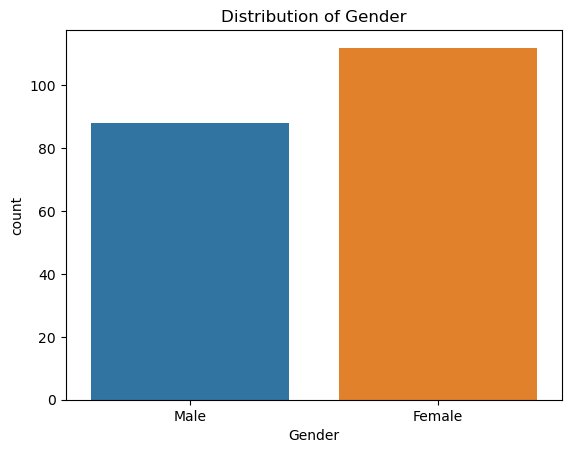

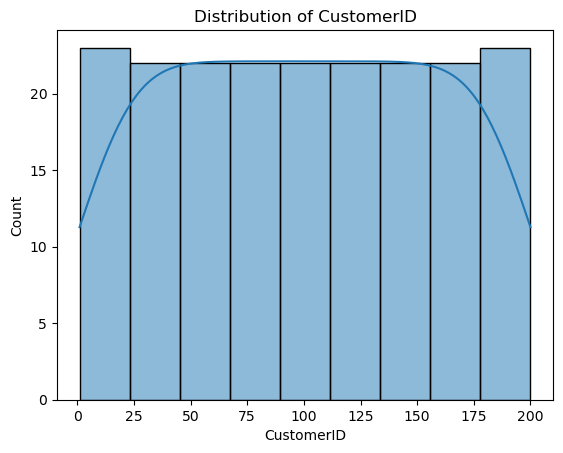

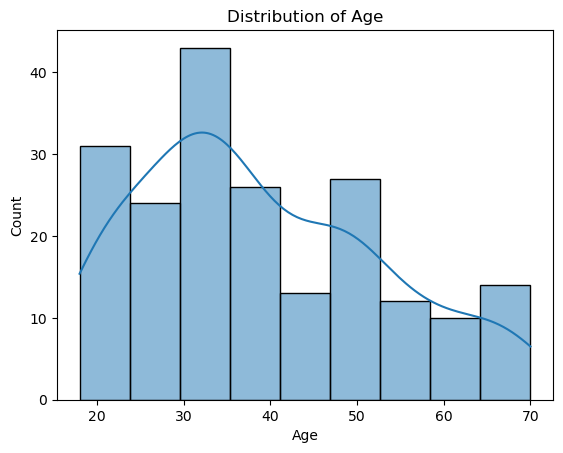

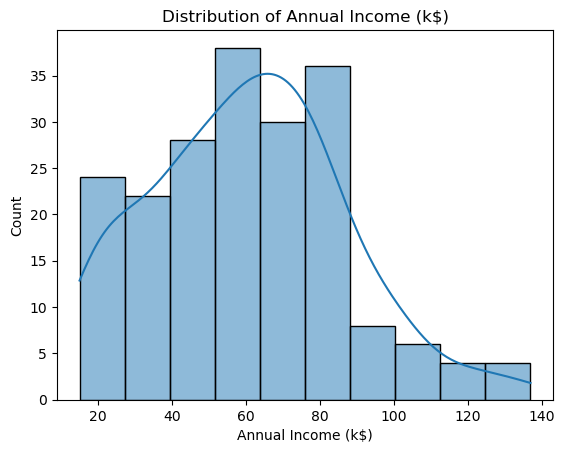

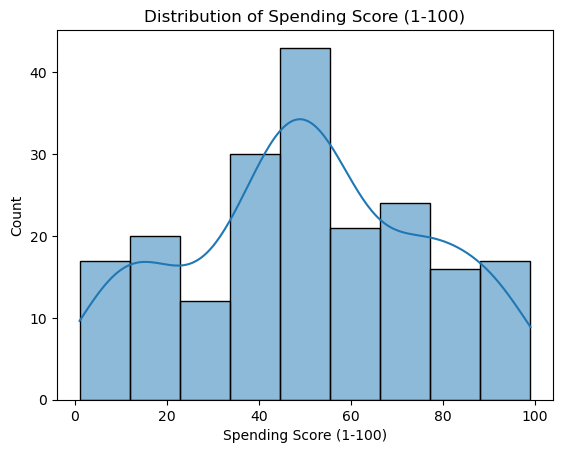

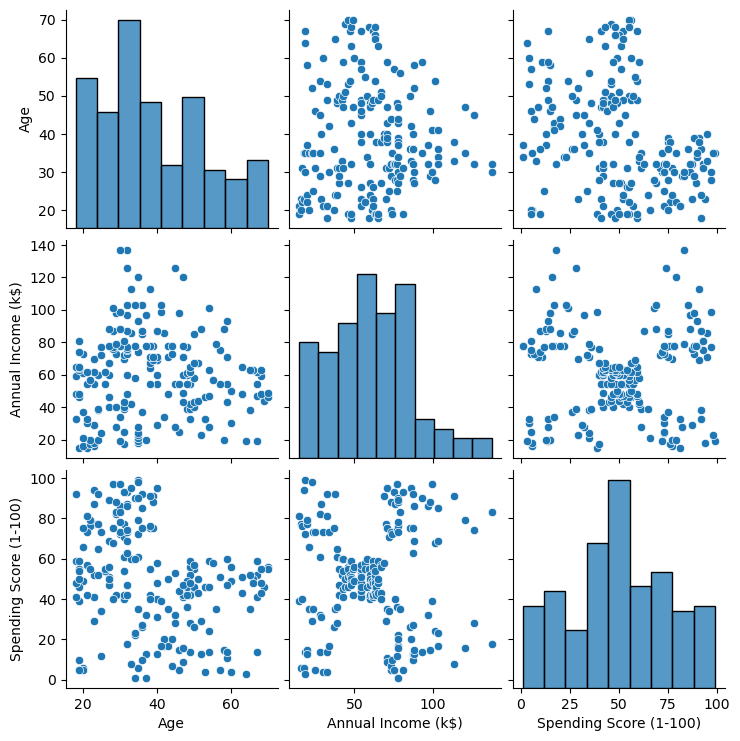

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Plot the distribution of gender
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

# Create histograms for all numeric columns
for column in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

sns.pairplot(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])

- Based on our analysis, several key observations can be made from the graphs and pairplot. Firstly, we can observe that the number of female customers exceeds the number of male customers. Additionally, the age range of the customers spans from 10 to 70 years old, with the highest concentration falling within the 30-35 age group, while the lowest concentration is observed among customers aged 60-65.

- In terms of annual income, the distribution ranges from 15,000 to 130,000, with the most common income falling between 55,000 and 85,000. Furthermore, the score assigned by the mall to customers based on their behavior and spending tendencies, ranging from 0 to 100, predominantly falls within the 45-55 range. This indicates that the customers in this survey exhibit moderate spending patterns.

- Overall, the pairplot provides a clearer visualization of these results and allows for the identification of patterns within the data.

# Third Step : Explore the number of clusters

In the following code, we will be conducting a clustering analysis using the K-means algorithm to determine the optimal number of clusters present in our dataset.

C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ManosIeronymakisProb\.conda\envs\p

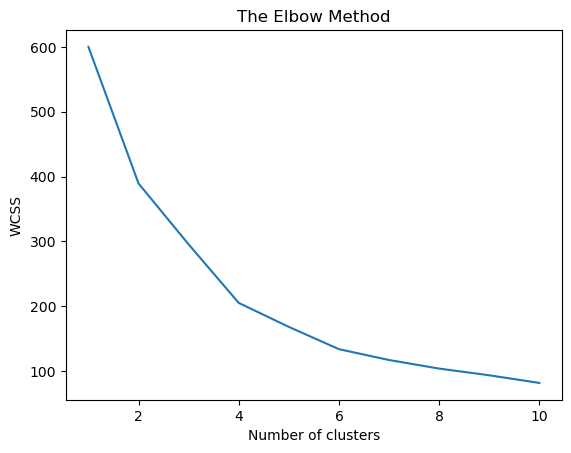

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting only the 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' columns
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

<!-- 
Note: Including the 'Gender' variable in the clustering analysis

In principle, all variables can be included in the clustering analysis. However, it's important to note that 'Gender' is a categorical variable, while K-means algorithm typically works with continuous numerical data. To include 'Gender' in the analysis, it needs to be converted into a numerical form. One common approach is to use one-hot encoding, which creates binary (0/1) variables for each category.

However, it's worth mentioning that including binary variables in K-means clustering may sometimes yield less meaningful results. This is because K-means utilizes Euclidean distance as a measure of similarity, which may not be the most appropriate measure for binary data. It could be beneficial to compare the results with and without including the 'Gender' variable to assess its impact on the overall clustering outcome.

Please consider these considerations when deciding whether to include the 'Gender' variable in the clustering analysis.
-->


<!-- 
Note: Including the 'Gender' variable in the clustering analysis

In principle, all variables can be included in the clustering analysis. However, it's important to note that 'Gender' is a categorical variable, while K-means algorithm typically works with continuous numerical data. To include 'Gender' in the analysis, it needs to be converted into a numerical form. One common approach is to use one-hot encoding, which creates binary (0/1) variables for each category.

However, it's worth mentioning that including binary variables in K-means clustering may sometimes yield less meaningful results. This is because K-means utilizes Euclidean distance as a measure of similarity, which may not be the most appropriate measure for binary data. It could be beneficial to compare the results with and without including the 'Gender' variable to assess its impact on the overall clustering outcome.

Please consider these considerations when deciding whether to include the 'Gender' variable in the clustering analysis.
-->


- Note: Including the 'Gender' variable in the clustering analysis

- In principle, all variables can be included in the clustering analysis. However, it's important to note that 'Gender' is a categorical variable, while K-means algorithm typically works with continuous numerical data. To include 'Gender' in the analysis, it needs to be converted into a numerical form. One common approach is to use one-hot encoding, which creates binary (0/1) variables for each category.

- However, it's worth mentioning that including binary variables in K-means clustering may sometimes yield less meaningful results. This is because K-means utilizes Euclidean distance as a measure of similarity, which may not be the most appropriate measure for binary data. It could be beneficial to compare the results with and without including the 'Gender' variable to assess its impact on the overall clustering outcome.




- The Elbow method involves plotting the explained variation (in this case, the within-cluster sum of squares, or WCSS) as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.In the plot that this code generates, the x-axis represents the number of clusters and the y-axis represents the WCSS.  We're looking for the point where adding another cluster doesn't significantly decrease WCSS - this is the "elbow" of the plot.So from the elbow chart, it is evident that the optimal number of clusters for our data is 6.

In the following code we are gonna check how many clusters are there with the Sihouette method.
The Silhouette method measures the quality of clustering by assessing how well each object fits within its assigned cluster. It calculates the average silhouette width, which indicates the overall goodness of the clustering. The Silhouette score ranges from -1 (worst) to 1 (best), where a higher score indicates a better clustering. A score close to 1 suggests that the data point is highly similar to other points within its cluster, while a score near -1 implies that the data point is dissimilar to the points in its cluster.



In [13]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

# The optimal number of clusters is the one that maximizes the Silhouette score
optimal_k = sil.index(max(sil)) + 2
print(optimal_k)

C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

6


C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a m

- The optimal number of clusters is the one that maximizes the Silhouette score, which in our case is 6 as before in elbow chart.

# Fourth Step : Visualise the Clusters

C:\Users\ManosIeronymakisProb\.conda\envs\probailityDev\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


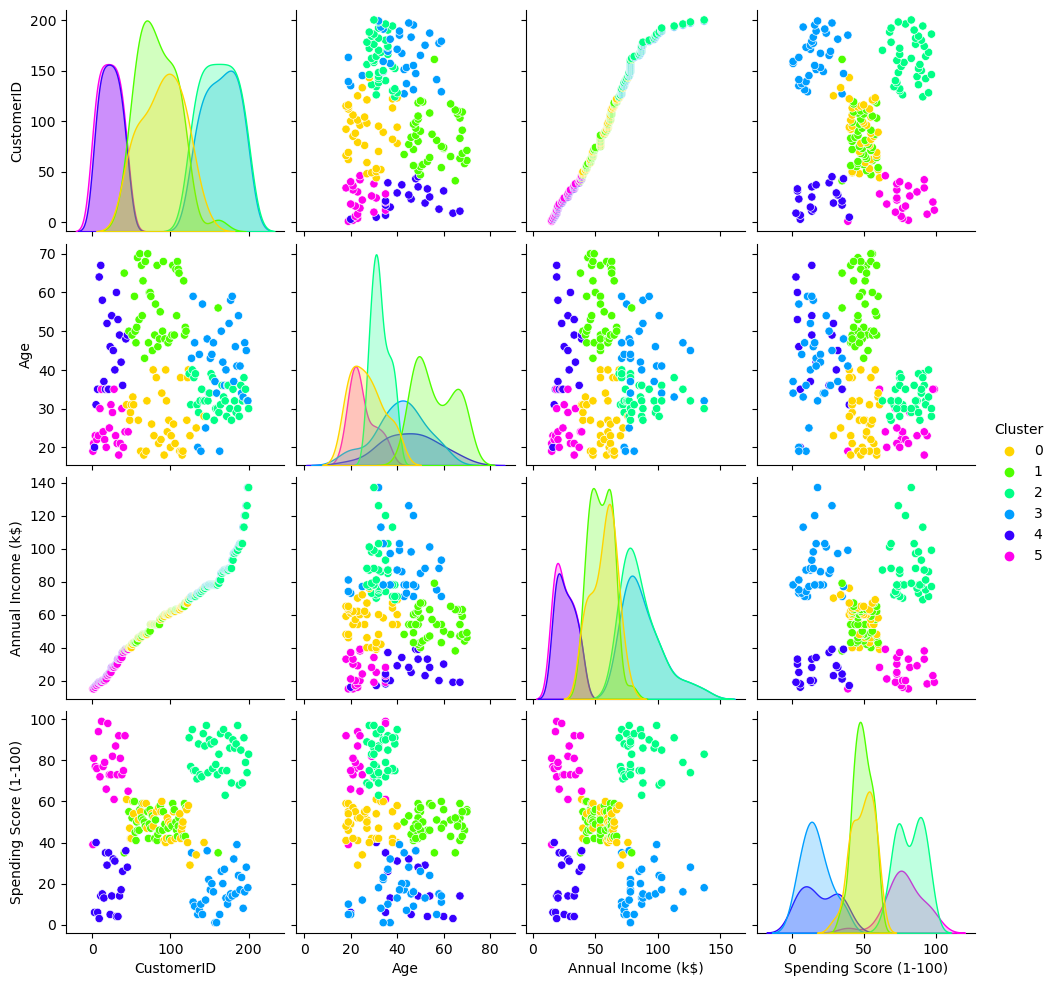

In [14]:
# Applying kmeans to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Create a dataframe with the cluster labels
df_cluster = df.copy()
df_cluster['Cluster'] = y_kmeans

# Pairplot
sns.pairplot(df_cluster, hue='Cluster', palette=sns.color_palette('hsv', optimal_k), diag_kind='kde')
plt.show()

# CONCLUSION

- In Python, the concept of clusters refers to groups or collections of data points that exhibit similarities and are closely located in a multi-dimensional space. Clustering, a technique used in machine learning and data analysis, helps us uncover patterns, group similar data points, and reveal underlying structures within our data. In our specific scenario, we have identified six distinct clusters, representing different categories that our customers can be classified into based on factors like age, annual income, and spending score. This clustering approach enables us to better understand our customers' behaviors and tailor our strategies accordingly.

About the business insights, we have to take a proper look in our finall pairplot and clusters. This is the characteristics of our clusters.

- CLUSTER 1: Customers with high annual income and low spending score and age between 20-60 years old. (blue)

- CLUSTER 2: Customers with average annual income and average spending score and age between 20-60 years old. ( light green and yellow)

- CLUSTER 3: Customers with high annual income and high spending score and age betwwen 25-40 years old. (green)

- CLUSTER 4: Customers with low annual income and high spending score and age between 20-40 years old. (pink)

- CLUSTER 5: Customers with low annual income and low spending score and age between 35-65 years old. (dark blue)

Now that we know our clusters, we can develop a marketing strategy for each target group.

1. CLUSTER 1 (High income, low spending, age 20-60): This customer segment represents an opportunity for increased revenue given their high income level but low current spending. The mall should consider introducing personalized marketing strategies that highlight premium products, services, and exclusive events. This can include targeted email campaigns or in-app notifications. Given the high income of this segment, introducing a premium loyalty program with exclusive benefits could incentivize increased spending. Additionally, understanding the reasons behind their current low spending could be beneficial, and thus conducting customer surveys is recommended.

2. CLUSTER 2 (Average income, average spending, age 20-60): This customer segment represents steady, regular shoppers with average income and spending levels. Marketing strategies for this group should focus on maintaining customer engagement through regular deals, product announcements, and personalized recommendations. A points-based rewards program could also be effective, providing incentives for every purchase.

3. CLUSTER 3 (High income, high spending, age 25-40): This customer segment is the most lucrative, as they have both the financial means and the propensity to spend. To maintain their high engagement level, the mall should offer personalized services, exclusive offers, and access to high-end products and brands. Exclusive events, as well as early access to sales or new products, could further boost their shopping experience and loyalty.

4. CLUSTER 4 (Low income, high spending, age 20-40): Despite lower income levels, this customer segment exhibits high spending behavior. Marketing strategies should focus on offering budget-friendly deals, sales, and products that offer value for money. A rewards program offering discounts could be effective in maintaining their spending levels. Furthermore, events targeted towards this younger demographic could keep them engaged and interested in the mall's offerings.

5. CLUSTER 5 (Low income, low spending, age 35-65): This customer segment, characterized by low income and low spending, may require strategies focused on value. Sales, discounts, and budget-friendly stores might appeal to them. If appropriate, consider offering a senior discount. Events or classes related to budgeting or value shopping might also be of interest to this group.

These marketing strategies aim to cater to the unique preferences and behaviors of each customer segment. They should be flexible and adaptable, with an emphasis on continual learning and understanding of customer behavior and preferences. Periodic customer segmentation and analysis would ensure that the strategies remain relevant and effective.